## Load Librarieis

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

sns.set_style('darkgrid')
# sns.set(style="white")

# import openpyxl
from sklearn.model_selection import train_test_split
from sklearn import linear_model
# Plot inline in notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Load Data from CSV file

In [79]:
# Load data from csv file
df = pd.read_csv('exploration.csv')

#  y =complexity score
y = df['Complexity_Score']

#  y_GA and y_AL in two serise
y_GA = y[:320].apply(int)
y_AL = y[320:].apply(int)

#  y_GA and y_AL in two df
y_GA_df = pd.DataFrame(data=y[:320], dtype=np.int8)
y_AL_df = pd.DataFrame(data=y[320:], dtype=np.int8)

Code = df['Code']
 
y_df =df[['Code', 'Group', 'Complexity_Score']].copy()

In [81]:
y_df.head()

,Code,Group,Complexity_Score
0,GA.1,GA,21
1,GA.2,GA,18
2,GA.3,GA,21
3,GA.4,GA,14
4,GA.5,GA,18


In [5]:
# creating a df for Complexity_Score and splitted it by video Type 
# Compelexity_score = y

grouped = y_df.groupby('Group')
grouped.describe()

Complexity_Score                                                   
                 count       mean       std  min   25%   50%    75%   max
Group                                                                    
AL               320.0  17.012500  3.684225  7.0  15.0  18.0  20.00  23.0
GA               320.0  16.759375  3.380041  8.0  14.0  17.0  19.25  24.0

### Exploratory Analysis on all Videos 

Basic Stats on Video Complexity Scores  

count    640.000000
mean      16.885938
std        3.534908
min        7.000000
25%       15.000000
50%       17.000000
75%       20.000000
max       24.000000
Name: Complexity_Score, dtype: float64


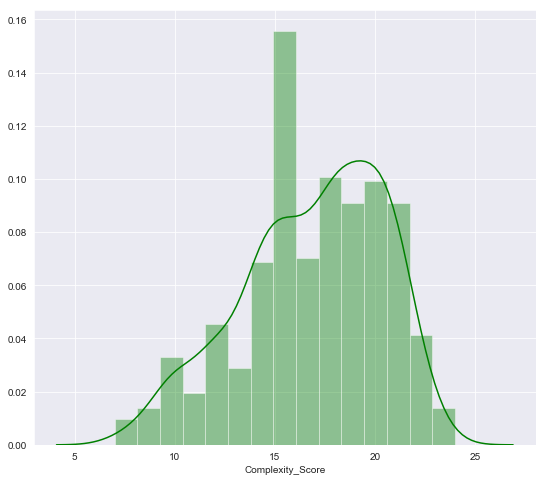

In [15]:
print("Basic Stats on Video Complexity Scores  \n" )
print(y_df['Complexity_Score'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(y_df['Complexity_Score'], color='g', bins=15, hist_kws={'alpha': 0.4});


### Skewness and Kurtosis

In [16]:
# skewness and kurtosis
print("skeweness is %f" % y.skew())
print("Kurtosis is %f" % y.kurt())

skeweness is -0.491660
Kurtosis is -0.481434


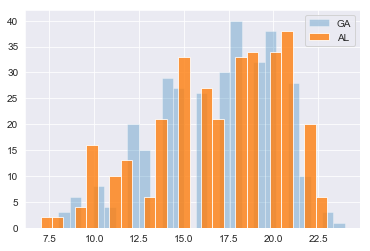

In [17]:
#  Visulaizing AS in both Genres 


pyplot.hist(y_GA, bins=25, alpha=0.3, label='GA')
pyplot.hist(y_AL, bins=25, alpha=0.8, label='AL')
pyplot.legend(loc='upper right')
pyplot.show()

### # y values counts

In [18]:
y_ValueCounts = y.value_counts()
print (y_ValueCounts)

18    73
20    72
21    66
19    66
15    60
16    53
17    51
14    50
12    33
22    30
10    24
13    21
11    14
9     10
23     9
8      5
7      2
24     1
Name: Complexity_Score, dtype: int64


### Split Videos in four bins (y) 

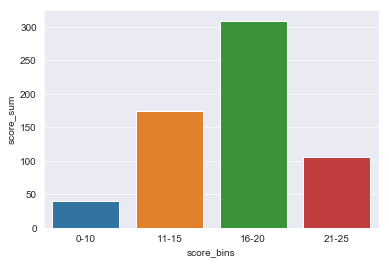

In [19]:
# create four bins 
score_sum = df.loc[df['score_sum'].notnull(), 'score_sum'] = df.loc[df['score_sum'].notnull(), 'score_sum'].apply(int)
sns.barplot(x="score_bins", y="score_sum", data=df)

In [20]:
#  caculating quartile
sorted(y)
q3, median, q1 = np.percentile(y, [75,50,25])
mean = int(y.mean())


# y_q75 = [x for x in Score.groupby(Score['Complexity_Score'] <= q75)]
# median = [x for _, x in Score.groupby(Score['Complexity_Score'] <= median)]
# q25 = [x for _, x in Score.groupby(Score['Complexity_Score'] <= q25)]
# above_mean = [x for _, x in Score.groupby(Score['Complexity_Score'] >= mean)]
# below_mean = [x for _, x in Score.groupby(Score['Complexity_Score'] <= mean)]

### Detecting Outliers

(638, 3)

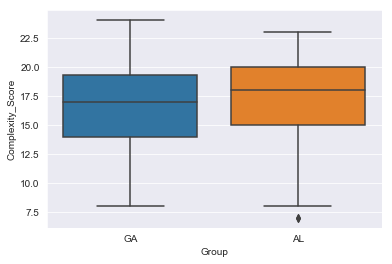

In [33]:

#  ploting y w outliers
ax = sns.boxplot(x="Group", y="Complexity_Score", data=df)

# Caculating interquartile range (IQR)
IQR = q3 - q1
IQR_y = (y < (q1 - 1.5 * IQR)) | (y > (q3 + 1.5 * IQR))
y_no_outlier = y_df[~((y < (q1 - 1.5 * IQR)) |(y > (q3 + 1.5 * IQR)))]

#  two points are outliers 
y_no_outlier.shape


Wikipedia Definition: 
The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.

### Deleting outliers 

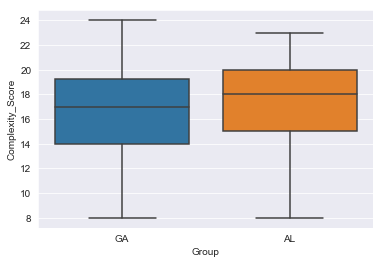

In [34]:
ax = sns.boxplot(x="Group", y="Complexity_Score", data=y_no_outlier)

### Academic Lecture Video Analysis

count    320.000000
mean      17.012500
std        3.684225
min        7.000000
25%       15.000000
50%       18.000000
75%       20.000000
max       23.000000
Name: Complexity_Score, dtype: float64


Skewness: -0.550841
Kurtosis: -0.487282


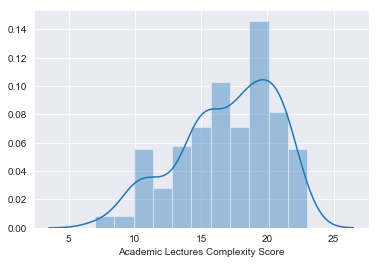

In [40]:
print (y_AL.describe())
#  plotting y distribution
x = pd.Series(y_AL, name= "Academic Lectures Complexity Score")
sns.distplot(x)
print ("\n")
#skewness and kurtosis
print("Skewness: %f" % y_AL.skew())
print("Kurtosis: %f" % y_AL.kurt())

### Top 10  most difficult videos

In [82]:
y_no_outlier.nlargest(10, 'Complexity_Score')

,Code,Group,Complexity_Score
260,GA.261,GA,24
16,GA.17,GA,23
90,GA.91,GA,23
161,GA.162,GA,23
365,AL.46,AL,23
442,AL.123,AL,23
452,AL.133,AL,23
471,AL.152,AL,23
497,AL.178,AL,23
498,AL.179,AL,23


### Example of GA Difficult Video

In [86]:
%%HTML
<iframe width="560" height="415" src="https://www.youtube.com/embed/I6BF0IJHmLs"></iframe>

### Example of Difficult AL video

In [87]:
%%HTML
<iframe width="560" height="415" src="https://www.youtube.com/embed/WJxHJKCq9ew"></iframe>

## Top 10  most easiest videos

In [88]:
 y_no_outlier.nsmallest(10, 'Complexity_Score')

,Code,Group,Complexity_Score
123,GA.124,GA,8
124,GA.125,GA,8
192,GA.193,GA,8
459,AL.140,AL,8
609,AL.290,AL,8
99,GA.100,GA,9
122,GA.123,GA,9
125,GA.126,GA,9
139,GA.140,GA,9
174,GA.175,GA,9


### Example of Easy GA Video

In [91]:
%%HTML
<iframe width="560" height="415" src="https://www.youtube.com/embed/-dLWrMjib5w"></iframe>

### Example of Easy AL Video

In [94]:

%%HTML
<iframe width="560" height="415" src="https://www.youtube.com/embed/K3GV13uokbk"></iframe>

In [ ]:
#applying log transformation
# logged_y_AL = np.log(y_AL)
# logged_y_AL.describe()

In [ ]:
# Plot miles per gallon against horsepower with other semantics
# sns.set(style="white")
# sns.relplot(x= y_GA, y= Code, sizes=(40, 400), alpha=.5, palette="muted", height=6,
#      data=df)

In [ ]:
# sns.barplot(x="Unique_Score", y="Score_Count", data=df,
#             label="Total", color="b")

In [ ]:
# sns.pairplot(df, kind="scatter")
# sns.pairplot(df, kind="reg")
# plt.show()

In [ ]:
# sns.set(style="white", color_codes=True)
# sns.jointplot(x=df["AL_Score"], y=df["GA_Score"], kind='kde', color="skyblue")


In [ ]:
# sns.jointplot(x=df["AL_Score"], y=df["GA_Score"], kind='scatter', s=100, color='m', edgecolor="skyblue", linewidth=2)

In [ ]:
# p1=sns.kdeplot(df['Average_score'], shade=True, color="r")
#  p1=sns.kdeplot(df['GA_Score'], shade=True, color="b")



In [ ]:
# sns.kdeplot(df['Average_score'], shade=True, bw=.5, color="olive")


In [67]:
# ax = sns.boxplot(x='y_AL', y='y_GA', data=df)
# ax = sns.swarmplot(x='y_AL', y='y_GA', data=df, color="grey")


In [ ]:
df["AL_Score"].dropna()
df["GA_Score"].dropna()
sns.distplot( df["AL_Score"] , color="skyblue", label="Sepal Length")
sns.distplot( df["GA_Score"] , color="red", label="Sepal Width")
sns.plt.legend()

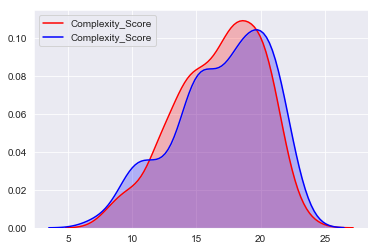

In [97]:
p1=sns.kdeplot(y_GA, shade=True, color="r")
p1=sns.kdeplot(y_AL, shade=True, color="b")
#sns.plt.show()


In [ ]:
sns.violinplot("Code", "Average_score", data=df,
               palette=["lightblue", "lightpink"]);

In [ ]:
with sns.axes_style('white'):
    g = sns.factorplot("Average_score", data=df, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=1)

In [ ]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot('Code', 'Average_score', data=df, kind="box")
    g.set_axis_labels("Video Genre", "Score");

In [ ]:
with sns.axes_style('white'):
    sns.jointplot("GA_Score", 'AL_Score', data=df, kind='hex')

In [ ]:

pyplot.hist('GA_Score', bins=25, alpha=0.5, label='GA')
pyplot.hist('AL_Score', bins=25, alpha=0.5, label='AL')
pyplot.legend(loc='upper right')
pyplot.show()

In [ ]:
sns.set()
cols = ['GA_Score','Index']
sns.pairplot(df[cols], size = 2.5)
plt.show();

In [ ]:
with sns.axes_style('white'):
    sns.relplot(x='Index', y='Average_score', hue='Code', size='Index',
                sizes=(80, 400), alpha=.5, palette="muted",
                height=6, data=df)

In [ ]:
ax = sns.kdeplot(y_GA, 
                 Code,  
                 cmap="YlOrBr", 
                 shade=True, shade_lowest=False)

ax = sns.kdeplot(y_AL, 
                 Code, 
                 cmap="Reds", 
                 shade=True, shade_lowest=False)